In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/Social_Network_Ads(2).csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.shape

(400, 5)

In [9]:
x=df.iloc[:,2:4]
y=df.iloc[:,4]

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [12]:
print(xtrain[:3])
print('_'*15)
print(xtest[:3])

[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]]
_______________
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]]


In [13]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [14]:
classifier=LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [15]:
y_pred=classifier.predict(xtest)

In [16]:
print(xtest[:10])
print('_'*15)
print(y_pred[:10])

[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]
 [-1.09058306 -1.44652121]
 [-0.70174008 -1.59138156]
 [-0.21568634  2.14601566]
 [-1.96547978 -0.05586178]
 [ 0.85363187 -0.78016356]]
_______________
[0 0 0 0 0 0 0 1 0 0]


In [17]:
print(y_pred[:20])
print(ytest[:20])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
37     0
134    0
113    0
348    0
12     0
59     0
293    0
140    0
206    1
199    0
Name: Purchased, dtype: int64


In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


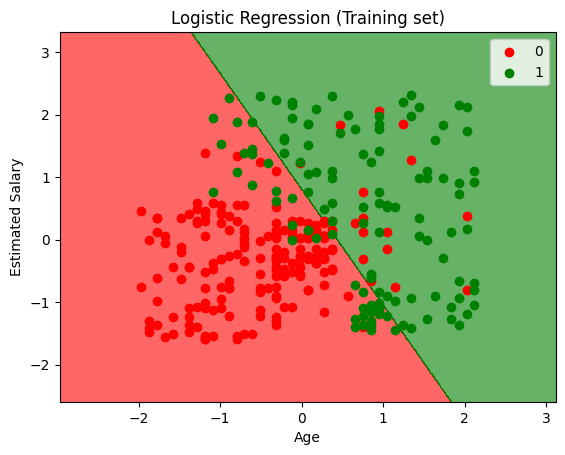

In [26]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
xset, yset = xtrain, ytrain
x1, x2 = np.meshgrid(np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
                     np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01))
predicted_classes = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1, x2, predicted_classes, alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

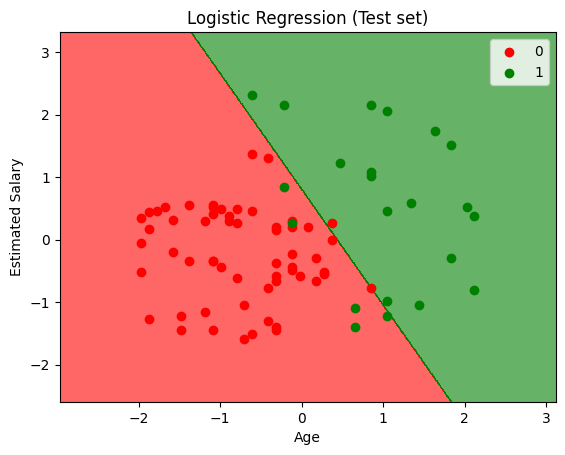

In [25]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
xset, yset = xtest, ytest
x1, x2 = np.meshgrid(np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
                     np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01))
predicted_classes = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1, x2, predicted_classes, alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()